# BIG FIVE

# 1. Teoria

> Column Prefix and Category Mapping

DEF1:
- EXT - Questions to measure Extroversion.
- AGR - Questions to measure Agreeableness
- CSN - Questions to measure Conscientiousness
- EST - Questions to measure Neuroticism (Emotional Stability is the OPPOSITE of Neuroticism, FYI?)
- OPN - Questions to measure Openness to Experience

DEF2:
- Openness to experience (inventive/curious vs. consistent/cautious)
- Conscientiousness (efficient/organized vs. easy-going/careless)
- Extroversion (outgoing/energetic vs. solitary/reserved)
- Agreeableness (friendly/compassionate vs. challenging/detached)
- Neuroticism (sensitive/nervous vs. secure/confident)

DEF3:
The Big Five personality traits are:

- Openness :
People who like to learn new things and enjoy new experiences usually score high in openness. Openness includes traits like being insightful and imaginative and having a wide variety of interests.

- Conscientiousness :
People that have a high degree of conscientiousness are reliable and prompt. Traits include being organized, methodic, and thorough.

- Extraversion :
Extraverts get their energy from interacting with others, while introverts get their energy from within themselves. Extraversion includes the traits of energetic, talkative, and assertive.

- Agreeableness :
These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant. Traits include being kind, affectionate, and sympathetic.

- Neuroticism :
Neuroticism is also sometimes called Emotional Stability. This dimension relates to one’s emotional stability and degree of negative emotions. People that score high on neuroticism often experience emotional instability and negative emotions. Traits include being moody and tense.

Alcune fonti: 
> https://en.wikipedia.org/wiki/Big_Five_personality_traits 
> https://ipip.ori.org/newBigFive5broadKey.htm 
> https://www.kaggle.com/tunguz/big-five-personality-test

# 2. Librerie...

In [2]:
# BASE PACKAGES:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pathlib import Path
import missingno as msno

# CLUSTERING:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture

#WARNING SUPPRESSION:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# PANDAS DISPLAY SETTINGS:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [2]:
# Funzione che visualizza i dati mancanti, in percentuale, per ciascuna feature
def missing_values_table(df):
    
    # Toatale dei valori mancanti
    mis_val = df.isnull().sum()
    # Percentuale di valori mancanti
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Tipo per ciascuna feature
    mis_val_type = df.dtypes

    # Tabella dei risultati
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)    
    # Rinomina le colonne
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
    # Ordina la tabella in base alla percentuale di valori mancanti in ordine discendente
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

# Funzione che visualizza la distribuzione delle risposte per ciascuna domanda
def show_QA_distribution(data, groupname, questions, color):
    print('Distribuzione delle risposte per ciascuna domanda legata al gruppo: ', groupname)
    
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
                  
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)
        

In [5]:
path_prefix = 'C:/Users/TirocinioMatteo/Desktop/Python_3/'
path_prefix = 'C:/Users/edoardo.frapiccini/Desktop/vai/AI/pratica/Machine learning for credit scoring/progetti/'
raw_data=pd.read_csv(path_prefix + 'Vai/ai/big 5/clusterizzazione/dataset/data-final.csv', delimiter='\t')

In [6]:
data = raw_data.copy()
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,...,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,...,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,...,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,...,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,...,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,...,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [7]:
# Conto il numero di italiani
(data['country']=="IT").value_counts()

country
False    1010022
True        5319
Name: count, dtype: int64

In [8]:
# Sort dei dati per paese
print(data['country'].value_counts().sort_values(ascending=False))

country
US    546403
GB     66596
CA     61849
AU     50030
PH     19847
       ...  
TD         1
KM         1
FK         1
MH         1
SH         1
Name: count, Length: 223, dtype: int64


Selezione delle features

In [10]:
print("Dateset originale:",data.shape)

# SOLO DOMANDE  
data_Q = data.drop(data.columns[50:110], axis=1)
print("Dataset con le sole 50 domande:", data_Q.shape)
#data_Q.to_csv('C:/Users/TirocinioMatteo/Desktop/Python_3/BIG_FIVE/Dataset/data_Q.csv', index=False)

# DOMANDE E NAZIONE (Country)
data_Q_C = pd.concat([data_Q, data['country']], axis=1)
print("Dataset con 50 domande e Nazione:", data_Q_C.shape)

# Elimino i record/partecipanti con valori nulli
data_Q_C_Xmv = data_Q_C.dropna()
print("Dataset con 50 domande e Nazione senza valori mancanti:", data_Q_C_Xmv.shape)

# Dataset con sole righe con IPC =1
data_IPC1 = data[data['IPC']==1]
print("Dataset (con valori mancanti) solo record con IPC=1:", data_IPC1.shape)

# stampo dataset con domande e nazione
data_Q_C.head()


Dateset originale: (1015341, 110)
Dataset con le sole 50 domande: (1015341, 50)
Dataset con 50 domande e Nazione: (1015341, 51)
Dataset con 50 domande e Nazione senza valori mancanti: (1013481, 51)
Dataset, solo record con IPC=1: (696845, 110)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [11]:
"""
-->Lista domande:

EXT1	I am the life of the party.
EXT2	I don't talk a lot.
EXT3	I feel comfortable around people.
EXT4	I keep in the background.
EXT5	I start conversations.
EXT6	I have little to say.
EXT7	I talk to a lot of different people at parties.
EXT8	I don't like to draw attention to myself.
EXT9	I don't mind being the center of attention.
EXT10	I am quiet around strangers.
EST1	I get stressed out easily.
EST2	I am relaxed most of the time.
EST3	I worry about things.
EST4	I seldom feel blue.
EST5	I am easily disturbed.
EST6	I get upset easily.
EST7	I change my mood a lot.
EST8	I have frequent mood swings.
EST9	I get irritated easily.
EST10	I often feel blue.
AGR1	I feel little concern for others.
AGR2	I am interested in people.
AGR3	I insult people.
AGR4	I sympathize with others' feelings.
AGR5	I am not interested in other people's problems.
AGR6	I have a soft heart.
AGR7	I am not really interested in others.
AGR8	I take time out for others.
AGR9	I feel others' emotions.
AGR10	I make people feel at ease.
CSN1	I am always prepared.
CSN2	I leave my belongings around.
CSN3	I pay attention to details.
CSN4	I make a mess of things.
CSN5	I get chores done right away.
CSN6	I often forget to put things back in their proper place.
CSN7	I like order.
CSN8	I shirk my duties.
CSN9	I follow a schedule.
CSN10	I am exacting in my work.
OPN1	I have a rich vocabulary.
OPN2	I have difficulty understanding abstract ideas.
OPN3	I have a vivid imagination.
OPN4	I am not interested in abstract ideas.
OPN5	I have excellent ideas.
OPN6	I do not have a good imagination.
OPN7	I am quick to understand things.
OPN8	I use difficult words.
OPN9	I spend time reflecting on things.
OPN10	I am full of ideas.
"""

"\n-->Lista domande:\n\nEXT1\tI am the life of the party.\nEXT2\tI don't talk a lot.\nEXT3\tI feel comfortable around people.\nEXT4\tI keep in the background.\nEXT5\tI start conversations.\nEXT6\tI have little to say.\nEXT7\tI talk to a lot of different people at parties.\nEXT8\tI don't like to draw attention to myself.\nEXT9\tI don't mind being the center of attention.\nEXT10\tI am quiet around strangers.\nEST1\tI get stressed out easily.\nEST2\tI am relaxed most of the time.\nEST3\tI worry about things.\nEST4\tI seldom feel blue.\nEST5\tI am easily disturbed.\nEST6\tI get upset easily.\nEST7\tI change my mood a lot.\nEST8\tI have frequent mood swings.\nEST9\tI get irritated easily.\nEST10\tI often feel blue.\nAGR1\tI feel little concern for others.\nAGR2\tI am interested in people.\nAGR3\tI insult people.\nAGR4\tI sympathize with others' feelings.\nAGR5\tI am not interested in other people's problems.\nAGR6\tI have a soft heart.\nAGR7\tI am not really interested in others.\nAGR8\tI t

In [12]:
# Riporto tutte le domane associate a ciascuna feature:

ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Mi salvo delle liste che possono tornarmi utili 
EXT = [column for column in data_Q if column.startswith('EXT')]
EST = [column for column in data_Q if column.startswith('EST')]
AGR = [column for column in data_Q if column.startswith('AGR')]
CSN = [column for column in data_Q if column.startswith('CSN')]
OPN = [column for column in data_Q if column.startswith('OPN')]

Plot delle distribuzioni per ogni domanda 

Distribuzione delle risposte per ciascuna domanda legata al gruppo:  ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']


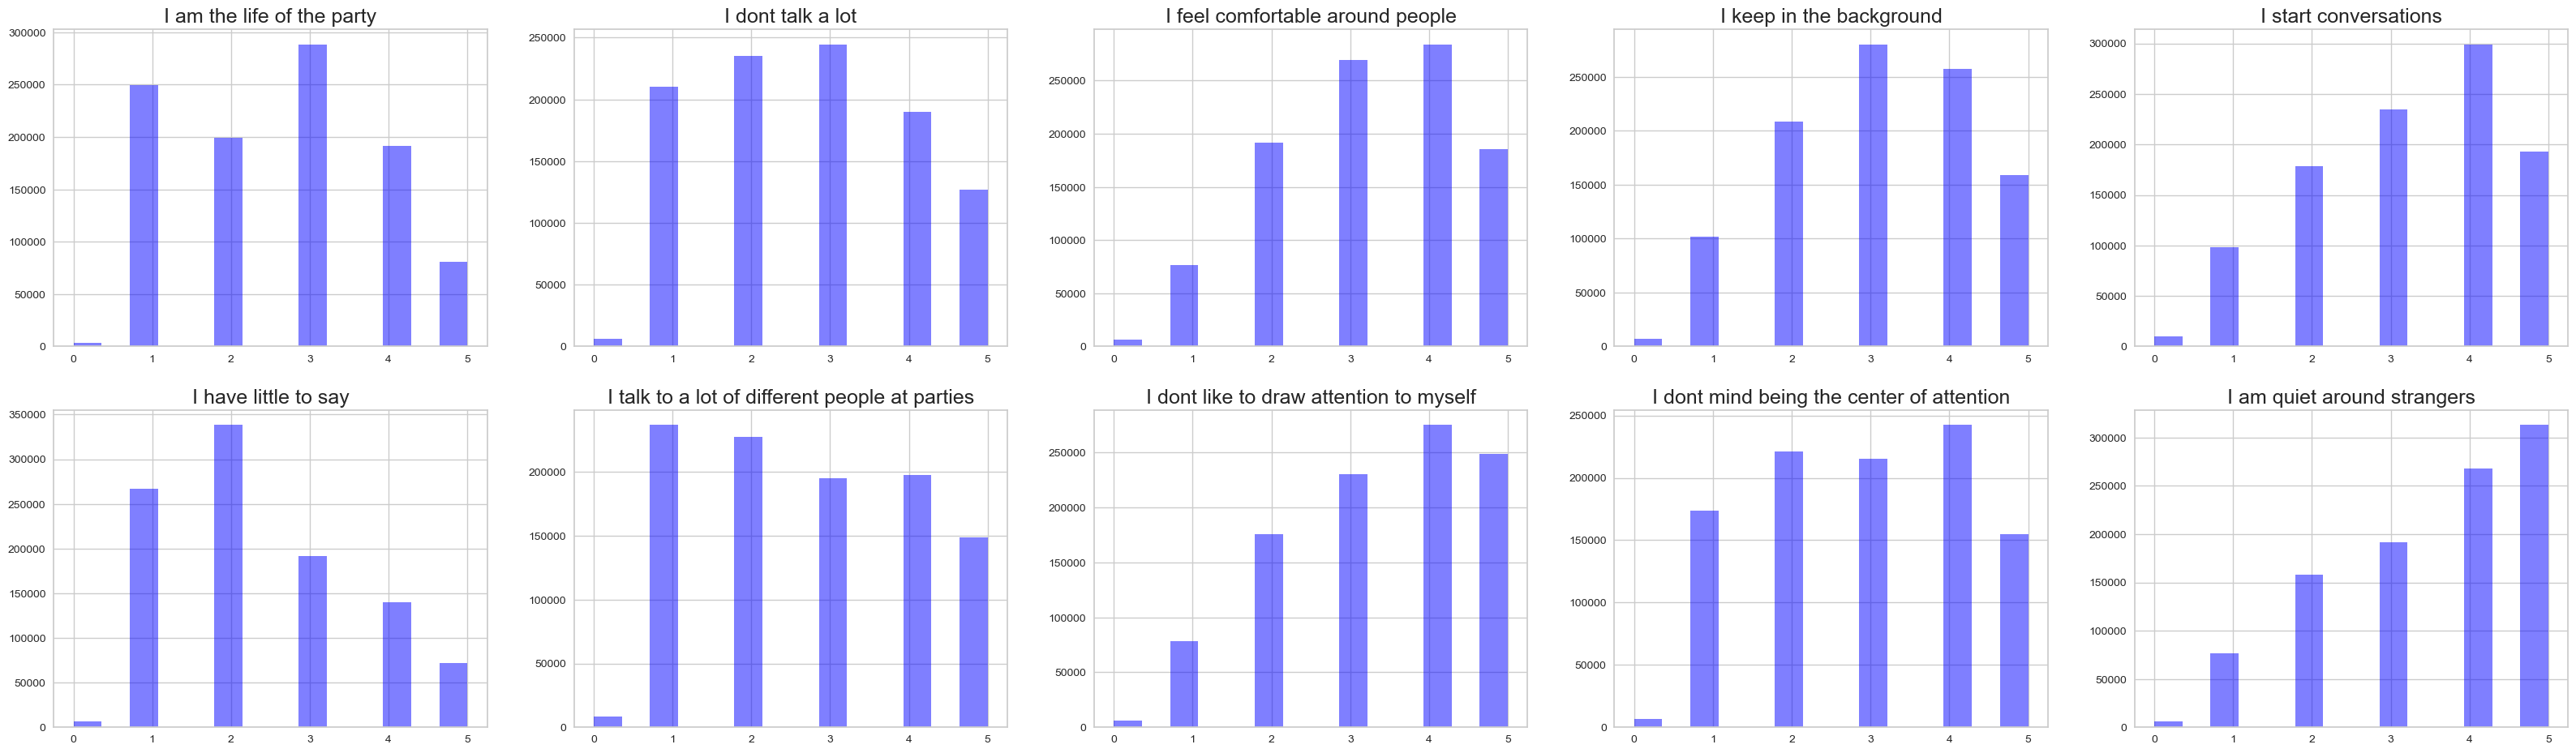

In [13]:
show_QA_distribution(data_Q, EXT, ext_questions, 'blue')

In [ ]:
#show_QA_distribution(data_Q, EST, est_questions, 'red')

In [ ]:
#show_QA_distribution(data_Q, AGR, agr_questions, 'green')

In [ ]:
#show_QA_distribution(data_Q, CSN, csn_questions, 'orange')

In [ ]:
#show_QA_distribution(data_Q, OPN, opn_questions, 'purple')

Conteggio valori errati

In [14]:
wrong_values_count = {}

# cambiare il nome del dataset da controllare
dataset_to_check = data_Q_C_Xmv.drop('country', axis=1)

for value in dataset_to_check.values.flatten():
    if value not in [1, 2, 3, 4, 5]:
        if value in wrong_values_count:
            wrong_values_count[value] += 1
        else:
            wrong_values_count[value] = 1

wrong_values_count

{0.0: 370356}

Elimino record che presentano il valore zero 

In [15]:
# elimino tutti i record con risposte uguali a 0

data_Q_C_Xmv_X0 = data_Q_C_Xmv[(data_Q_C_Xmv != 0).all(axis=1)]
print("Dataset con 50 domande e Nazione senza valori mancanti e senza zeri:", data_Q_C_Xmv_X0.shape)

Dataset con 50 domande e Nazione senza valori mancanti e senza zeri: (874366, 51)


CONTEGGIO DATASET CON SOLI STATI EUROPEII

In [16]:
sigle_stati_europei = ["AL","AD","AT","BY","BE","BA","BG","HR","CY","VA","DK","EE","FI","FR","DE","GR","IE","IS","IT","XK","LV","LI","LT","LU","MK","MT","MD","MC","ME","NO","NL","PL","PT","GB","CZ","RO","RU","SM","RS","SK","SI","ES","SE","CH","TR","UA","HU"]

# solo quelli presenti nel dataset
sigle_stati_europei_presenti = [stato for stato in sigle_stati_europei if stato in data_Q_C_Xmv_X0['country'].values]

totale_europei= data_Q_C_Xmv_X0['country'].value_counts()[sigle_stati_europei_presenti].sum()

print("Totale di europei:", totale_europei)

# in percentuale
print("Percentuale di europei:", (totale_europei/data_Q_C_Xmv_X0.shape[0]*100))

# conta il totale di europei
print("Stati europei presenti nel DS:", len(sigle_stati_europei_presenti))

#  ordianli in modo decrescente
print(data_Q_C_Xmv_X0['country'].value_counts()[sigle_stati_europei_presenti].sort_values(ascending=False))


Totale di europei: 165168
Percentuale di europei: 18.89003003318976
Stati europei presenti nel DS: 46
country
GB    57820
DE    12464
NO     9323
SE     9122
NL     8662
FR     5413
DK     4812
IT     4571
IE     4568
ES     4304
PL     4008
FI     3855
BE     3349
RO     3339
RU     2855
CH     2734
TR     2466
PT     2205
GR     2123
AT     1942
HR     1896
RS     1750
CZ     1735
HU     1318
BG     1112
LT      966
EE      890
SK      859
SI      763
UA      644
IS      537
LV      463
BA      458
AL      360
MT      336
MK      296
CY      257
LU      192
BY      138
ME      123
MD      113
AD       12
XK        5
MC        4
LI        4
SM        2
Name: count, dtype: int64


(165168, 51)

In [17]:
# Controllo se qualcuno ha inserito lo stesso valore per tutte le domande...
for i in [1,2,3,4,5]:
    num_records_with_ones = (data_Q_C_Xmv_X0 == i).all(axis=1).sum()
    print(f"Numero di record con tutte le risposte uguali a {i}:", num_records_with_ones)

Numero di record con tutte le risposte uguali a 1: 0
Numero di record con tutte le risposte uguali a 2: 0
Numero di record con tutte le risposte uguali a 3: 0
Numero di record con tutte le risposte uguali a 4: 0
Numero di record con tutte le risposte uguali a 5: 0


CALCOLO DEL PUNTEGGIO

1. Punteggio con dimensioni suddivise

In [18]:
data_5D_divided10=data_Q_C_Xmv_X0.copy()

col_list = list(data_5D_divided10)

ext = ['EXT1','EXT3','EXT5','EXT7','EXT9'] # positivi
ınt = ['EXT2','EXT4','EXT6','EXT8','EXT10'] # negativi

agr = ['AGR2','AGR4','AGR6','AGR8','AGR9', 'AGR10'] # positivi
cpt = ['AGR1','AGR3','AGR5','AGR7'] # negativi

csn = ['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10']# positivi
spt = ['CSN2','CSN4','CSN6','CSN8'] # negativi

est = ['EST2','EST4'] # positivi
nrt = ['EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10'] # negativi

opn = ['OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10'] # positivi
cst = ['OPN2','OPN4','OPN6'] # negativi

data_5D_divided10['extroversion'] = data_5D_divided10[ext].sum(axis=1)
data_5D_divided10['introversion'] = data_5D_divided10[ınt].sum(axis=1)

data_5D_divided10['agreeable'] = data_5D_divided10[agr].sum(axis=1)
data_5D_divided10['competitiveness'] = data_5D_divided10[cpt].sum(axis=1)

data_5D_divided10['conscientious'] = data_5D_divided10[csn].sum(axis=1)
data_5D_divided10['spontaneity'] = data_5D_divided10[spt].sum(axis=1)

data_5D_divided10['emotionally_stable'] = data_5D_divided10[est].sum(axis=1)
data_5D_divided10['neurotic'] = data_5D_divided10[nrt].sum(axis=1)

data_5D_divided10['open'] = data_5D_divided10[opn].sum(axis=1)
data_5D_divided10['consistency'] = data_5D_divided10[cst].sum(axis=1)

data_5D_divided10.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,extroversion,introversion,agreeable,competitiveness,conscientious,spontaneity,emotionally_stable,neurotic,open,consistency
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB,23.0,7.0,23.0,8.0,20.0,12.0,6.0,18.0,30.0,3.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY,12.0,22.0,26.0,6.0,22.0,9.0,4.0,17.0,22.0,5.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB,12.0,17.0,23.0,5.0,19.0,9.0,6.0,20.0,27.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB,11.0,15.0,23.0,9.0,14.0,13.0,5.0,22.0,26.0,5.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE,17.0,18.0,26.0,4.0,28.0,4.0,8.0,15.0,33.0,3.0


2. Punteggio da calcolare come da indicazione solo (+ e -): https://ipip.ori.org/newBigFive5broadKey.htm https://ipip.ori.org/new_ipip-50-item-scale.htm

In [ ]:
# Sommo i valori di determinate rispsote per ciascuna domanda
data_Q_C_Xmv_X0["EXT_score"]=data_Q_C_Xmv_X0["EXT1"]-data_Q_C_Xmv_X0["EXT2"]+data_Q_C_Xmv_X0["EXT3"]-data_Q_C_Xmv_X0["EXT4"]+data_Q_C_Xmv_X0["EXT5"]-data_Q_C_Xmv_X0["EXT6"]+data_Q_C_Xmv_X0["EXT7"]-data_Q_C_Xmv_X0["EXT8"]+data_Q_C_Xmv_X0["EXT9"]-data_Q_C_Xmv_X0["EXT10"]

data_Q_C_Xmv_X0["AGR_score"]=-data_Q_C_Xmv_X0["AGR1"]+data_Q_C_Xmv_X0["AGR2"]-data_Q_C_Xmv_X0["AGR3"]+data_Q_C_Xmv_X0["AGR4"]-data_Q_C_Xmv_X0["AGR5"]+data_Q_C_Xmv_X0["AGR6"]-data_Q_C_Xmv_X0["AGR7"]+data_Q_C_Xmv_X0["AGR8"]+data_Q_C_Xmv_X0["AGR9"]+data_Q_C_Xmv_X0["AGR10"]

data_Q_C_Xmv_X0["CSN_score"]=data_Q_C_Xmv_X0["CSN1"]-data_Q_C_Xmv_X0["CSN2"]+data_Q_C_Xmv_X0["CSN3"]-data_Q_C_Xmv_X0["CSN4"]+data_Q_C_Xmv_X0["CSN5"]-data_Q_C_Xmv_X0["CSN6"]+data_Q_C_Xmv_X0["CSN7"]-data_Q_C_Xmv_X0["CSN8"]+data_Q_C_Xmv_X0["CSN9"]+data_Q_C_Xmv_X0["CSN10"]

data_Q_C_Xmv_X0["EST_score"]=-data_Q_C_Xmv_X0["EST1"]+data_Q_C_Xmv_X0["EST2"]-data_Q_C_Xmv_X0["EST3"]+data_Q_C_Xmv_X0["EST4"]-data_Q_C_Xmv_X0["EST5"]-data_Q_C_Xmv_X0["EST6"]-data_Q_C_Xmv_X0["EST7"]-data_Q_C_Xmv_X0["EST8"]-data_Q_C_Xmv_X0["EST9"]-data_Q_C_Xmv_X0["EST10"]    

data_Q_C_Xmv_X0["OPN_score"]=data_Q_C_Xmv_X0["OPN1"]-data_Q_C_Xmv_X0["OPN2"]+data_Q_C_Xmv_X0["OPN3"]-data_Q_C_Xmv_X0["OPN4"]+data_Q_C_Xmv_X0["OPN5"]-data_Q_C_Xmv_X0["OPN6"]+data_Q_C_Xmv_X0["OPN7"]+data_Q_C_Xmv_X0["OPN8"]+data_Q_C_Xmv_X0["OPN9"]+data_Q_C_Xmv_X0["OPN10"]


3. Punteggio con aggiunta della costante

In [6]:
# Sommo i valori di determinate rispsote per ciascuna domanda
data_Q_C_Xmv_X0["EXT_score"]= 20 +data_Q_C_Xmv_X0["EXT1"]-data_Q_C_Xmv_X0["EXT2"]+data_Q_C_Xmv_X0["EXT3"]-data_Q_C_Xmv_X0["EXT4"]+data_Q_C_Xmv_X0["EXT5"]-data_Q_C_Xmv_X0["EXT6"]+data_Q_C_Xmv_X0["EXT7"]-data_Q_C_Xmv_X0["EXT8"]+data_Q_C_Xmv_X0["EXT9"]-data_Q_C_Xmv_X0["EXT10"]

data_Q_C_Xmv_X0["AGR_score"]= 14 -data_Q_C_Xmv_X0["AGR1"]+data_Q_C_Xmv_X0["AGR2"]-data_Q_C_Xmv_X0["AGR3"]+data_Q_C_Xmv_X0["AGR4"]-data_Q_C_Xmv_X0["AGR5"]+data_Q_C_Xmv_X0["AGR6"]-data_Q_C_Xmv_X0["AGR7"]+data_Q_C_Xmv_X0["AGR8"]+data_Q_C_Xmv_X0["AGR9"]+data_Q_C_Xmv_X0["AGR10"]

data_Q_C_Xmv_X0["CSN_score"]= 14 +data_Q_C_Xmv_X0["CSN1"]-data_Q_C_Xmv_X0["CSN2"]+data_Q_C_Xmv_X0["CSN3"]-data_Q_C_Xmv_X0["CSN4"]+data_Q_C_Xmv_X0["CSN5"]-data_Q_C_Xmv_X0["CSN6"]+data_Q_C_Xmv_X0["CSN7"]-data_Q_C_Xmv_X0["CSN8"]+data_Q_C_Xmv_X0["CSN9"]+data_Q_C_Xmv_X0["CSN10"]

data_Q_C_Xmv_X0["EST_score"]= 38 -data_Q_C_Xmv_X0["EST1"]+data_Q_C_Xmv_X0["EST2"]-data_Q_C_Xmv_X0["EST3"]+data_Q_C_Xmv_X0["EST4"]-data_Q_C_Xmv_X0["EST5"]-data_Q_C_Xmv_X0["EST6"]-data_Q_C_Xmv_X0["EST7"]-data_Q_C_Xmv_X0["EST8"]-data_Q_C_Xmv_X0["EST9"]-data_Q_C_Xmv_X0["EST10"]    

data_Q_C_Xmv_X0["OPN_score"]= 8 +data_Q_C_Xmv_X0["OPN1"]-data_Q_C_Xmv_X0["OPN2"]+data_Q_C_Xmv_X0["OPN3"]-data_Q_C_Xmv_X0["OPN4"]+data_Q_C_Xmv_X0["OPN5"]-data_Q_C_Xmv_X0["OPN6"]+data_Q_C_Xmv_X0["OPN7"]+data_Q_C_Xmv_X0["OPN8"]+data_Q_C_Xmv_X0["OPN9"]+data_Q_C_Xmv_X0["OPN10"]


C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_14432\1227303893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Q_C_Xmv_X0["EXT_score"]= 20 +data_Q_C_Xmv_X0["EXT1"]-data_Q_C_Xmv_X0["EXT2"]+data_Q_C_Xmv_X0["EXT3"]-data_Q_C_Xmv_X0["EXT4"]+data_Q_C_Xmv_X0["EXT5"]-data_Q_C_Xmv_X0["EXT6"]+data_Q_C_Xmv_X0["EXT7"]-data_Q_C_Xmv_X0["EXT8"]+data_Q_C_Xmv_X0["EXT9"]-data_Q_C_Xmv_X0["EXT10"]
C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_14432\1227303893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
# describe() delle ultime 4 colonne
data_Q_C_Xmv_X0[['EXT_score', 'AGR_score', 'CSN_score', 'EST_score', 'OPN_score']].describe()

# i valori minimi sono (se non uso la costante):
# EXT_score    -20.0
# AGR_score    -14.0
# CSN_score    -14.0
# EST_score    -38.0
# OPN_score    -8.0

# --> ecco spiegato il motivo per cui viene applicata la trasformazione (+/-) una costante 
# https://sites.temple.edu/rtassessment/files/2018/10/Table_BFPT.pdf

Plotta la distribuzione delle risultati anche per controllare la scala

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(data_Q_C_Xmv_X0['EXT_score'], bins=40, color='blue', alpha=.5)
plt.title('EXT_score', fontsize=18)

plt.subplot(2,3,2)
sns.histplot(data_Q_C_Xmv_X0['AGR_score'], bins=40, color='red', alpha=.5)
plt.title('AGR_score', fontsize=18)

plt.subplot(2,3,3)
sns.histplot(data_Q_C_Xmv_X0['CSN_score'], bins=40, color='green', alpha=.5)
plt.title('CSN_score', fontsize=18)

plt.subplot(2,3,4)
sns.histplot(data_Q_C_Xmv_X0['EST_score'], bins=40, color='orange', alpha=.5)
plt.title('EST_score', fontsize=18)

plt.subplot(2,3,5)
sns.histplot(data_Q_C_Xmv_X0['OPN_score'], bins=40, color='purple', alpha=.5)
plt.title('OPN_score', fontsize=18)



Definisco dataset da testare d'ora in poi:

In [7]:
data_to_test = data_Q_C_Xmv_X0.drop(['country','EXT_score', 'AGR_score', 'CSN_score', 'EST_score', 'OPN_score' ], axis=1)
#data_to_test= data_Q_C_Xmv_X0.drop(['country'], axis=1)


In [8]:
data_to_test.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


# Kmeans

## Trovo k OTTIMALE 

1. Elbow method

In [ ]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), timings= True) #di default metric='distortion', 
""" distorsion e wcss sono la stessa cosa:
il WCSS quantifica quanto i punti dati all'interno di ciascun cluster sono vicini al centroide (il punto medio) del cluster stesso. Più i punti sono vicini al centroide, minore sarà il valore del WCSS, il che indica una maggiore coesione all'interno del cluster. """

visualizer.fit(data_to_test)        
visualizer.show()  

2. Silhouette method

In [ ]:

""" from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings= True)
visualizer.fit(data_to_test)       
visualizer.show() 

# durata 833m --> k=2 """

> BEFORE CLUSTERING
fonte: https://builtin.com/data-science/when-and-why-standardize-your-data

- I modelli di clustering sono algoritmi basati sulla distanza. Di conseguenza, in generale, le features con ampi intervalli avranno una maggiore influenza sul clustering. Pertanto, è necessaria una standardizzazione prima di costruire un modello di clustering. Ma nel nostro caso abbiamo features che hanno tutti valori che vanno da 1 a 5, quindi questo step non è necessario

# K-means


- Definisco i cluster (k=5)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
k_fit = kmeans.fit(data_to_test)

predictions = k_fit.labels_
data_to_test['Clusters'] = predictions
data_to_test.head()

Stampo il conteggio degli elementi per ogni Cluster

In [ ]:
data_to_test.Clusters.value_counts()

In [ ]:
data_to_test.groupby('Clusters').mean()

Definisco un dataframe con gli score e i cluster

In [11]:
data_5D = pd.DataFrame()

data_5D['EXT_score'] = data_Q_C_Xmv_X0["EXT_score"]
data_5D['AGR_score'] = data_Q_C_Xmv_X0["AGR_score"]
data_5D['CSN_score'] = data_Q_C_Xmv_X0["CSN_score"]
data_5D['EST_score'] = data_Q_C_Xmv_X0["EST_score"]
data_5D['OPN_score'] = data_Q_C_Xmv_X0["OPN_score"]
data_5D['Clusters'] = predictions



- BoxPlot con Vari cluster e metriche per ogni singolo score

In [ ]:
# Calcolo di media, varianza e deviazione standard per ogni cluster e score
grouped_data = data_5D.groupby('Clusters').agg(['mean', 'var', 'std'])
grouped_data

In [12]:
# plotta sulle x EST_score e sulle y CSN_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_5D, x='EST_score', y='CSN_score', hue='Clusters', palette='viridis')
plt.title('Scatter Plot per EST_score e CSN_score')
plt.xlabel('EST_score')
plt.ylabel('CSN_score')
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Clusters` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
dataclusters = data_5D.groupby('Clusters').mean()

plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    #plt.ylim(0,4);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della dimensione e dello stile del plot
#plt.figure(figsize=(15, 8))

# Lista degli score da visualizzare
scores = ['EXT_score',  'AGR_score', 'CSN_score', 'EST_score','OPN_score']

# Ciclo per creare e plottare un boxplot per ogni cluster
for cluster in range(5):
    plt.figure(figsize=(12, 10))
    data = [data_5D[score][data_5D['Clusters'] == cluster] for score in scores]
    plt.boxplot(data)
    plt.title(f'Box Plot per Cluster {cluster}', fontsize=18)
    plt.xlabel('Score')
    plt.ylabel('Valore')

    # Aggiunta di media, varianza e deviazione standard nel grafico
    for j, cluster_data in enumerate(data):
        mean = cluster_data.mean()
        std = cluster_data.std()
        plt.text(j+1, mean, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='bottom')

    plt.xticks(range(1, 6), scores)
    plt.tight_layout()
    plt.show()
    

1. EXT score

In [ ]:
# Creazione del box plot per EXT_score
plt.figure(figsize=(10, 6))
data = [data_5D['EXT_score'][data_5D['Clusters'] == cluster] for cluster in range(5)]
#print(data)
plt.boxplot(data)
plt.title('Box Plot per EXT_score')
plt.xlabel('Clusters')
plt.ylabel('EXT_score')

# Aggiunta di media, varianza e deviazione standard nel grafico
for j, cluster_data in enumerate(data):
    mean = grouped_data.loc[j, ('EXT_score', 'mean')]
    std = grouped_data.loc[j, ('EXT_score', 'std')]
    plt.text(j+1, mean, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='bottom')

plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(5)])
plt.tight_layout()
plt.show()

In [ ]:
# Definizione della dimensione e dello stile del plot
plt.figure(figsize=(25, 6))

# Ciclo per creare e plottare gli istogrammi per i primi 5 cluster
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 riga, 5 colonne, i+1-esimo plot
    sns.histplot(data_5D['EXT_score'][data_5D['Clusters'] == i], bins=40, color="blue", alpha=.5)
    plt.title(f'Distribuzione di EXT_score per il Cluster {i}', fontsize=16)
    plt.xlabel('EXT_score')
    plt.ylabel('Frequenza')

# Mostra i plot
plt.tight_layout()
plt.show()

2. AGR_score

In [ ]:
# Creazione del box plot per AGR_score
plt.figure(figsize=(10, 6))
data = [data_5D['AGR_score'][data_5D['Clusters'] == cluster] for cluster in range(5)]
#print(data)
plt.boxplot(data)
plt.title('Box Plot per AGR_score')
plt.xlabel('Clusters')
plt.ylabel('AGR_score')

# Aggiunta di media, varianza e deviazione standard nel grafico
for j, cluster_data in enumerate(data):
    mean = grouped_data.loc[j, ('AGR_score', 'mean')]
    std = grouped_data.loc[j, ('AGR_score', 'std')]
    plt.text(j+1, mean, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='bottom')

plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(5)])
plt.tight_layout()
plt.show()

In [ ]:
# Definizione della dimensione e dello stile del plot
plt.figure(figsize=(25, 6))

# Ciclo per creare e plottare gli istogrammi per i primi 5 cluster
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 riga, 5 colonne, i+1-esimo plot
    sns.histplot(data_5D['AGR_score'][data_5D['Clusters'] == i], bins=40, color="red", alpha=.5)
    plt.title(f'Distribuzione di AGR_score per il Cluster {i}', fontsize=16)
    plt.xlabel('AGR_score')
    plt.ylabel('Frequenza')

# Mostra i plot
plt.tight_layout()
plt.show()

3. CSN_score

In [ ]:
# Creazione del box plot per CSN_score

plt.figure(figsize=(10, 6))
data = [data_5D['CSN_score'][data_5D['Clusters'] == cluster] for cluster in range(5)]
#print(data)
plt.boxplot(data)
plt.title('Box Plot per CSN_score')
plt.xlabel('Clusters')
plt.ylabel('CSN_score')

# Aggiunta di media, varianza e deviazione standard nel grafico
for j, cluster_data in enumerate(data):
    mean = grouped_data.loc[j, ('CSN_score', 'mean')]
    std = grouped_data.loc[j, ('CSN_score', 'std')]
    plt.text(j+1, mean, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='bottom')
    
plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(5)])
plt.tight_layout()
plt.show()



In [ ]:
# Definizione della dimensione e dello stile del plot
plt.figure(figsize=(25, 6))

# Ciclo per creare e plottare gli istogrammi per i primi 5 cluster
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 riga, 5 colonne, i+1-esimo plot
    sns.histplot(data_5D['CSN_score'][data_5D['Clusters'] == i], bins=40, color="green", alpha=.5)
    plt.title(f'Distribuzione di CSN_score per il Cluster {i}', fontsize=16)
    plt.xlabel('CSN_score')
    plt.ylabel('Frequenza')

# Mostra i plot
plt.tight_layout()
plt.show()

4. EST_score

In [ ]:
# Creazione del box plot per EST_score

plt.figure(figsize=(10, 6))
data = [data_5D['EST_score'][data_5D['Clusters'] == cluster] for cluster in range(5)]
#print(data)
plt.boxplot(data)
plt.title('Box Plot per EST_score')
plt.xlabel('Clusters')
plt.ylabel('EST_score')

# Aggiunta di media, varianza e deviazione standard nel grafico
for j, cluster_data in enumerate(data):
    mean = grouped_data.loc[j, ('EST_score', 'mean')]
    std = grouped_data.loc[j, ('EST_score', 'std')]
    plt.text(j+1, mean, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='bottom')
    
plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(5)])
plt.tight_layout()
plt.show()


In [ ]:
# Definizione della dimensione e dello stile del plot
plt.figure(figsize=(25, 6))

# Ciclo per creare e plottare gli istogrammi per i primi 5 cluster
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 riga, 5 colonne, i+1-esimo plot
    sns.histplot(data_5D['EST_score'][data_5D['Clusters'] == i], bins=40, color="ORANGE", alpha=.5)
    plt.title(f'Distribuzione di EST_score per il Cluster {i}', fontsize=16)
    plt.xlabel('EST_score')
    plt.ylabel('Frequenza')

# Mostra i plot
plt.tight_layout()
plt.show()

4. OPN_score

In [ ]:
# Creazione del box plot per OPN_score

plt.figure(figsize=(10, 6))
data = [data_5D['OPN_score'][data_5D['Clusters'] == cluster] for cluster in range(5)]
#print(data)
plt.boxplot(data)
plt.title('Box Plot per OPN_score')
plt.xlabel('Clusters')
plt.ylabel('OPN_score')

# Aggiunta di media, varianza e deviazione standard nel grafico
for j, cluster_data in enumerate(data):
    mean = grouped_data.loc[j, ('OPN_score', 'mean')]
    std = grouped_data.loc[j, ('OPN_score', 'std')]
    plt.text(j+1, mean, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='bottom')
    
plt.xticks(range(1, 6), [f'Cluster {i}' for i in range(5)])
plt.tight_layout()
plt.show()


In [ ]:
# Definizione della dimensione e dello stile del plot
plt.figure(figsize=(25, 6))

# Ciclo per creare e plottare gli istogrammi per i primi 5 cluster
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 riga, 5 colonne, i+1-esimo plot
    sns.histplot(data_5D['OPN_score'][data_5D['Clusters'] == i], bins=40, color="purple", alpha=.5)
    plt.title(f'Distribuzione di OPN_score per il Cluster {i}', fontsize=16)
    plt.xlabel('OPN_score')
    plt.ylabel('Frequenza')

# Mostra i plot
plt.tight_layout()
plt.show()

Visualizzazione  PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data_to_test)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions

#vedo quanta informazione ho perso con la PCA
print(pca.explained_variance_ratio_)

df_pca.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')
plt.show()

# -----------------------------------------------------------------------------

In [14]:
# CAST per ridurre dimensione
data_to_test = data_to_test.astype('int8')

In [18]:
Clusters_df = pd.DataFrame()

# sono numericamente maggiori dei 1000 campioni random che uso d'ora in poi
Clusters_df['EXT_score'] = data_Q_C_Xmv_X0["EXT_score"]
Clusters_df['AGR_score'] = data_Q_C_Xmv_X0["AGR_score"]
Clusters_df['CSN_score'] = data_Q_C_Xmv_X0["CSN_score"]
Clusters_df['EST_score'] = data_Q_C_Xmv_X0["EST_score"]
Clusters_df['OPN_score'] = data_Q_C_Xmv_X0["OPN_score"]

#Clusters_df['Clusters_Kmeans'] = predictions # sono di più..


NameError: name 'predictions' is not defined

# Afffinity propagation

In [ ]:

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# prendi 1000 campioni di data_to_test
data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# Crea l'oggetto AffinityPropagation
af = AffinityPropagation(damping=0.5, preference=None)

af.fit(data_to_test)

af_cluster_labels = af.labels_
af_cluster_centers_indices = af.cluster_centers_indices_

# Ottieni il numero di cluster trovati
n_clusters_AP1 = len(set(af_cluster_labels)) - (1 if -1 in af_cluster_labels else 0)
n_clusters_AP2 = len(af_cluster_centers_indices)

print("Number of clusters detected by the algorithm:", n_clusters_AP1)
print("Number of clusters detected by the algorithm:", n_clusters_AP2)

Clusters_df['Clusters_AffProp'] = af_cluster_labels
Clusters_df.head()


# Mean-shift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

# prendi 1000 campioni di data_to_test
data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

bandwidth = estimate_bandwidth(data_to_test, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(data_to_test)
ms_cluster_centers = ms.cluster_centers_
ms_cluster_labels = ms.labels_

n_clusters_MS = len(ms_cluster_centers)
n_cluster_ms=len(set(ms_cluster_labels))

print("Number of clusters detected by the algorithm:", n_clusters_MS)
print("Number of clusters detected by the algorithm:", n_cluster_ms)

Clusters_df['Clusters_MeanShift'] = ms_cluster_labels
Clusters_df.head()


# Spectral clustering

In [ ]:

"""
The present version of SpectralClustering requires the number of clusters to be specified in advance.
It works well for a small number of clusters, but is not advised for many clusters.

"""

from sklearn.cluster import SpectralClustering
from sklearn.utils import shuffle

# prendi 1000 campioni di data_to_test
data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

n_clusters = 2

sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)

sc.fit(data_to_test)

sc_cluster_labels = sc.labels_

n_cluster_sc=len(set(sc_cluster_labels))

print("Number of clusters detected by the algorithm:", n_cluster_sc)

Clusters_df['Clusters_SpectClust'] = sc_cluster_labels
Clusters_df.head()



# Agglomerative clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import shuffle

# prendi 1000 campioni di data_to_test
#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

n_clusters = 5

for linkage in ("ward", "average", "complete", "single"):

    ag = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

    ag.fit(data_to_test)
    ag_cluster_labels=ag.labels_
    # Esegui il clustering
    print(f"Linkage: {linkage}")
    print(f"Number of clusters detected by the algorithm: {ag.n_clusters_}")
    print(f"Labels: {ag.labels_}")
    
    Clusters_df[f'Clusters_AgglomClust_{linkage}'] = ag_cluster_labels

Clusters_df.head() 
    
    
    

MemoryError: Unable to allocate 2.78 TiB for an array with shape (382257513795,) and data type float64

# DBSCAN

In [19]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# eps (distanza massima tra due campioni per essere considerati nello stesso cluster)
# min_samples (numero minimo di campioni in un vicinato per un punto per essere considerato un core point)
eps = 0.5  # Distanza massima tra due punti per essere considerati nello stesso cluster
min_samples = 5  # Numero minimo di punti in un vicinato per essere considerato un core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

dbscan.fit(data_to_test)

# Esegui il clustering
dbscan_cluster_labels=dbscan.labels_ 

print("Number of clusters detected by the algorithm:", len(set(dbscan_cluster_labels)))

Clusters_df['Clusters_Dbscan'] = dbscan_cluster_labels

Clusters_df.head()



Number of clusters detected by the algorithm: 19


,EXT_score,AGR_score,CSN_score,EST_score,OPN_score,Clusters_Dbscan
0,36.0,29.0,22.0,26.0,35.0,-1
1,10.0,34.0,27.0,25.0,25.0,-1
2,15.0,32.0,24.0,24.0,31.0,-1
3,16.0,28.0,15.0,21.0,29.0,-1
4,19.0,36.0,38.0,31.0,38.0,-1


In [24]:
Clusters_df['Clusters_Dbscan'].value_counts()

Clusters_Dbscan
-1     872499
 0        683
 1        544
 5        341
 6         66
 3         59
 2         55
 4         45
 12        12
 8         10
 13         9
 11         7
 9          6
 10         5
 7          5
 14         5
 15         5
 16         5
 17         5
Name: count, dtype: int64

# HDBSCAN

# OPTICS

# Gaussian mixtures

In [20]:
from sklearn.mixture import GaussianMixture

#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# Crea l'oggetto GaussianMixture
# Puoi impostare i parametri come il numero di componenti e la covarianza
n_components = 4  # Numero di componenti (cluster) desiderato
gmm = GaussianMixture(n_components=n_components)

gmm.fit(data_to_test)

gmm_cluster_labels = gmm.predict(data_to_test)

print("Number of clusters detected by the algorithm:", len(set(gmm_cluster_labels)))

Clusters_df['Clusters_GMM'] = gmm_cluster_labels

Clusters_df.head()

Number of clusters detected by the algorithm: 4


,EXT_score,AGR_score,CSN_score,EST_score,OPN_score,Clusters_Dbscan,Clusters_GMM
0,36.0,29.0,22.0,26.0,35.0,-1,0
1,10.0,34.0,27.0,25.0,25.0,-1,3
2,15.0,32.0,24.0,24.0,31.0,-1,0
3,16.0,28.0,15.0,21.0,29.0,-1,0
4,19.0,36.0,38.0,31.0,38.0,-1,0


# BIRCH

# Bisecting K-Means